In [19]:
# dataset package 호출 
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [11]:
# data load
boston_houseprice_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [14]:
# DataFrame 생성
df = pd.DataFrame(
    data = boston_houseprice_data.data,
    columns = boston_houseprice_data.feature_names
)

In [15]:
# 출력 소수점 이하 3자리로 제한 
%precision 3
pd.set_option('precision', 3)

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14
2,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03
3,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94
4,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33


In [17]:
# 결과는 Series라는 1차원 구조로 출력 
# -> 2차원에서 하나의 컬럼만 사용하면 1차원인 Series로 변환됨 
df['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [18]:
# 데이터 크기 확인 -> 데이터 개수 : 506 / 변수 개수 : 13개 열
df.shape

(506, 13)

#### 평균값 (Mean / Average) 

In [20]:
sum(df['AGE']) / len(df['AGE'])

68.575

In [21]:
df['AGE'].mean()

68.575

In [22]:
np.mean(df['AGE'])

68.575

#### 중앙값(Median)
- 데이터 이상값 존재할 때, 평균값보다 대표값 잘 표현 (이상값 영향 덜 받음)

In [23]:
df['AGE'].median()

77.500

In [24]:
np.median(df['AGE'])

77.500

#### 최빈값 (Mode)
- 데이터에서 가장 많이 나타나는 값
- 주로, 범주형 변수(질적 변수) 대표값 구할 때 사용 

In [25]:
df['AGE'].mode()

0    100.0
dtype: float64

In [27]:
# numpy에서는 계산 불가
np.mode(df['AGE'])

AttributeError: ignored

## 산포도
- 대표값 중심으로 자료들이 흩어져 있는 정도 
- 대표값이 같아도 산포도에 따라 데이터 다른 특성 가짐
- 분산, 표준편차, 사분위

### 편차 
- 각 데이터가 평균으로 얼마나 떨어져 있는지 나타내는 지표

In [32]:
# 데이터 a
score_a = [42, 69, 56, 41, 57, 48, 65, 49, 65, 58]
df_score_a = pd.DataFrame(score_a)

In [33]:
# 데이터 b
score_b = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
df_score_b = pd.DataFrame(score_b)

In [34]:
df_score_a

,0
0,42
1,69
2,56
3,41
4,57
5,48
6,65
7,49
8,65
9,58


In [35]:
# a 편차 
df_score_a - df_score_a.mean()

,0
0,-13.0
1,14.0
2,1.0
3,-14.0
4,2.0
5,-7.0
6,10.0
7,-6.0
8,10.0
9,3.0


In [36]:
df_score_b

,0
0,50
1,60
2,58
3,54
4,51
5,56
6,57
7,53
8,52
9,59


In [38]:
# b 편차 -> 데이터 a 편차값의 절대값이 더 적다.
df_score_b - df_score_b.mean()


,0
0,-5.0
1,5.0
2,3.0
3,-1.0
4,-4.0
5,1.0
6,2.0
7,-2.0
8,-3.0
9,4.0


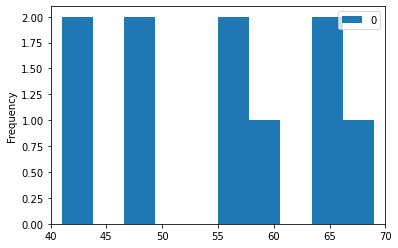

In [41]:
# b보다 더 흩어져 있는 것으로 보임
df_score_a.plot.hist(xlim = [40,70])

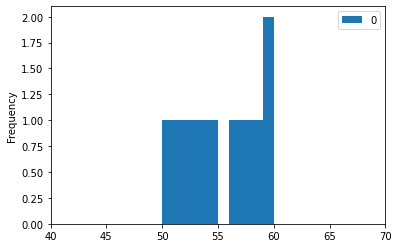

In [40]:
df_score_b.plot.hist(xlim = [40, 70])

In [42]:
# 편차 값들의 평균 -> 산포도 계산 X / 분산 활용해보기
(
    df_score_a - df_score_a.mean()
).mean()

0    0.0
dtype: float64

In [43]:
(
    df_score_b - df_score_b.mean()
).mean()

0    0.0
dtype: float64

### 분산 
- 편차의 제곱 합산하여 평균 계산한 값
- pandas에서 var() 계산된 분산 값은 numpy와 값이 다르다. 
 > 동일한 값 얻고 싶을 땐, ddof = 0 입력하면 됨 

In [44]:
df_score_a.var()

0    95.556
dtype: float64

In [45]:
df_score_b.var()

0    12.222
dtype: float64

In [46]:
np.var(df_score_a)

0    86.0
dtype: float64

In [47]:
np.var(df_score_b)

0    11.0
dtype: float64

In [48]:
df_score_a.var(ddof = 0)

0    86.0
dtype: float64

In [49]:
df_score_b.var(ddof = 0)

0    11.0
dtype: float64

### 표준편차
- 분산에 제곱근 취하여, 원래 데이터와 동일한 단위 쓰도록 하는 산포도의 지표

- Pandas
 
 : std()에 ddof = 0 넣어서 확인
- Numpy 

 :  sqrt() 제곱근 함수 분산값에 적용 /  std() 그대로 활용

In [50]:
df_score_a.std(ddof = 0)

0    9.274
dtype: float64

In [53]:
df_score_b.std(ddof = 0)

0    3.317
dtype: float64

In [54]:
np.sqrt(np.var(df_score_a))

0    9.274
dtype: float64

In [55]:
np.sqrt(np.var(df_score_b))

0    3.317
dtype: float64

### 범위 (Range)
- 데이터 최대값과 최소값만으로 산포도 표현
- 최대-최소값 차이가 크면 산포도 크고, 작으면 산포도 작다는 것
- 개략적 지표라 이상값 반영하기엔 수준 낮은 지표

In [56]:
df_score_a.max() - df_score_a.min()

0    28
dtype: int64

In [57]:
np.max(df_score_a) - np.min(df_score_a)

0    28
dtype: int64

### 사분위 범위 (interquartile range)
- 데이터의 하위 25%(Q1:제1사분위수), 50%(Q2:제2사분위수), 75%(Q3:제3사분위수)
- Q3 ‒ Q1을 사분위 범위 IQR로 정의한다

In [58]:
# Q3 - Q1
df_score_a.quantile(q = 0.75) - df_score_a.quantile(q = 0.25)

0    15.0
dtype: float64

In [60]:
# Q3 - Q1
np.percentile(df_score_a, 75) - np.percentile(df_score_a, 25)

15.000

#### Pandas의 Describe()
- 데이터의 수
- 평균 / 표준편차
- 최소값, Q1, Q2, Q3, 최대값


In [62]:
df_score_a.describe()

,0
count,10.000
mean,55.000
std,9.775
min,41.000
25%,48.250
50%,56.500
75%,63.250
max,69.000


## 정규화
- 데이터를 통일된 지표로 변환하는 것
- 표준화,편차값


#### 표준화 (Standardization)
- 데이터에서 평균을 빼고, 표준편차로 나누는 작업

In [64]:
(
    df_score_a - df_score_a.mean()
) / df_score_a.std(ddof = 0)

,0
0,-1.402
1,1.510
2,0.108
3,-1.510
4,0.216
5,-0.755
6,1.078
7,-0.647
8,1.078
9,0.323


In [66]:
(
    df_score_a - np.mean(df_score_a)
) / np.std(df_score_a)

,0
0,-1.402
1,1.510
2,0.108
3,-1.510
4,0.216
5,-0.755
6,1.078
7,-0.647
8,1.078
9,0.323


In [73]:
# 표준화 변화 이후 평균, 표준편차 측정
z = (
    df_score_a - df_score_a.mean()
) / df_score_a.std(ddof = 0)

In [70]:
z2 = (
    df_score_a - np.mean(df_score_a)
) / np.std(df_score_a)

In [71]:
z.mean()

0   -1.665e-17
dtype: float64

In [72]:
z.std(ddof = 0)

0    1.0
dtype: float64

In [74]:
np.mean(z)

0   -1.665e-17
dtype: float64

In [75]:
np.std(z)

0    1.0
dtype: float64

#### 편차값
- 평균 50, 표준편차가 10이 되도록 정규화한 값

In [76]:
50 + 10 * (
    df_score_a - df_score_a.mean()
) / df_score_a.std(ddof = 0)

,0
0,35.982
1,65.097
2,51.078
3,34.903
4,52.157
5,42.452
6,60.783
7,43.530
8,60.783
9,53.235


In [79]:
z_std = 50 + 10 * (
    df_score_a - np.mean(df_score_a)
) / np.std(df_score_a)

#### 점수, 편차값 비교
- 좌측 : 실제 점수값, 우측 : 편차값
- 편차값 지표를 통해 평균 성적과 우수한 성적 파악 가능

In [80]:
z_end = pd.concat([df_score_a, z_std], axis = 1)

In [81]:
z_end.columns = ['점수', '편차값']

In [82]:
z_end

,점수,편차값
0,42,35.982
1,69,65.097
2,56,51.078
3,41,34.903
4,57,52.157
5,48,42.452
6,65,60.783
7,49,43.530
8,65,60.783
9,58,53.235
